# Importing dataset

In [185]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv("./ColonTumor/colonTumor.data",delimiter=',' ,header=None,)  #Importing the Data into a pandas dataframe

In [186]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


# Encoding classification labels

In [187]:
def convert(x):
    if x == "negative":                # Assigning 0 if the class label is negative
        return 0
    else:                              # Assigning 1 if the class label is positive 
        return 1

In [188]:
df[2000] = map(lambda x: convert(x), df[2000])

In [189]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,0
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,1
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,1
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,0


In [190]:
print df[2000].value_counts()      # We have only 22 positive examples out of the total 62 samples.

0    40
1    22
Name: 2000, dtype: int64


# Splitting the data into training set and test set

In [191]:
# Let's assign the features and labels to different objects.
y = np.array(df[2000])
X = np.array(df.drop(2000, axis=1))

In [192]:
# Let's split the data into train and test set, we will keep only 10% for testing since the amount of data is small. 
# Later we will use cross validation on the training set to get better estimates of error. 

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0, stratify=y)

# Normalizing the data

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [194]:
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Transforming the features to a lower dimension with PCA

[]

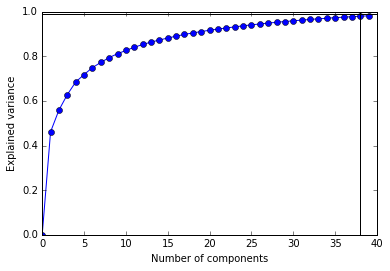

In [195]:
from sklearn.decomposition import PCA
components = [i for i in range(40)]
explained_variance = []

for component in components:
    pca = PCA(n_components=component)
    pca.fit(X_train_normalized)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(components, explained_variance, marker='o')
plt.axhline(0.99, color='black')
plt.axvline(38, color='black')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.plot()

So, looks like with 38 principal components we are retaining 99% of variance in the data. 

In [196]:
pca = PCA(n_components=38)
X_train_normalized_pca = pca.fit_transform(X_train_normalized)

In [197]:
X_test_normalized_pca = pca.transform(X_test_normalized)

# i) Logistic regression model

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import f1_score

skf = StratifiedKFold(y_train, n_folds=5)   # Running k-fold cross validation with 5 folds 
best_lr_model = None                        # Objects which will keep the best model after all the iterations
max_cv_accuracy = 0.0                       # Max cv accuracy reported by the classifier
choices_regularization_param = [0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24] # Choices for lambda 
dict_performance = {}                       # Dictionary to keep f1 score for each value of lambda 

for lambda_ in choices_regularization_param:
    current_f1_score = 0.0 
    for train_index, test_index in skf:     # Using l2 penalty for regularization for preventing overfitting. 
        clf = LogisticRegression(C=lambda_, penalty='l2', solver='liblinear', n_jobs=2, random_state=0)
        clf.fit(X_train_normalized_pca[train_index], y_train[train_index])
        y_pred = clf.predict(X_train_normalized_pca[test_index])
        current_f1_score += f1_score(y_train[test_index], y_pred)
    
    dict_performance[lambda_] = current_f1_score/5.0
    if current_f1_score/5.0 > max_cv_accuracy:
        max_cv_accuracy = current_f1_score/5.0
        best_lr_model = clf

In [199]:
dict_performance

{0.01: 0.76323232323232326,
 0.02: 0.70666666666666667,
 0.04: 0.63676767676767687,
 0.08: 0.63676767676767687,
 0.16: 0.63676767676767687,
 0.32: 0.64767676767676785,
 0.64: 0.64767676767676785,
 1.28: 0.60767676767676782,
 2.56: 0.60767676767676782,
 5.12: 0.60767676767676782,
 10.24: 0.60767676767676782}

In [200]:
pred_test = best_lr_model.predict(X_test_normalized_pca)

In [201]:
y_test

array([0, 0, 1, 1, 0, 0, 0])

In [202]:
print f1_score(y_test, pred_test)        # F1 score on test data 

1.0


# ii) Decision trees